In [210]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [211]:
file_path = 'C:/projects/case studys py/case study 4/Case Study 4 - Python Visualizations Case Study (santosh)//'

In [212]:
sales = pd.read_csv(file_path + 'SalesData.csv')
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [213]:
sales.duplicated().sum()

0

In [214]:
sales.isna().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

## 1. Compare Sales by region for 2016 with 2015 using bar chart

In [231]:
region_sale= sales.groupby(['Region'])[['Sales2015','Sales2016']].sum()
region_sale

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


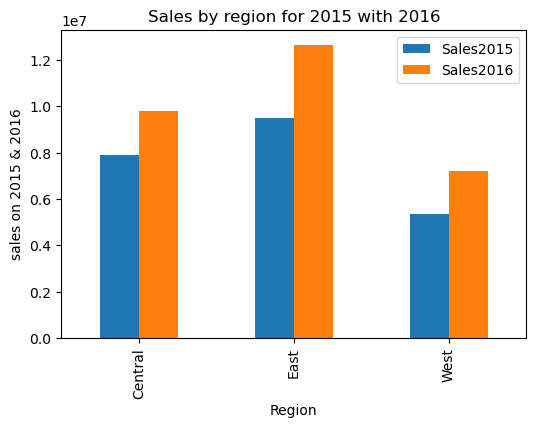

In [233]:
region_sale.plot(kind='bar',figsize=(6,4),title='Sales by region for 2015 with 2016')
plt.xlabel('Region')
plt.ylabel('sales on 2015 & 2016')
plt.show()

## 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [217]:
sale_pie=sales.groupby(['Region'])[['Sales2016']].sum()
sale_pie

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


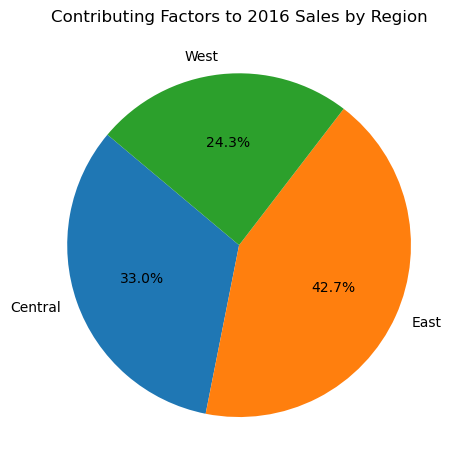

In [234]:
plt.pie(sale_pie['Sales2016'],autopct='%1.1f%%',labels=sale_pie.index,startangle=140)
plt.title('Contributing Factors to 2016 Sales by Region')
plt.tight_layout()
plt.show()

## 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [219]:
sale_tier = sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()
sale_tier

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

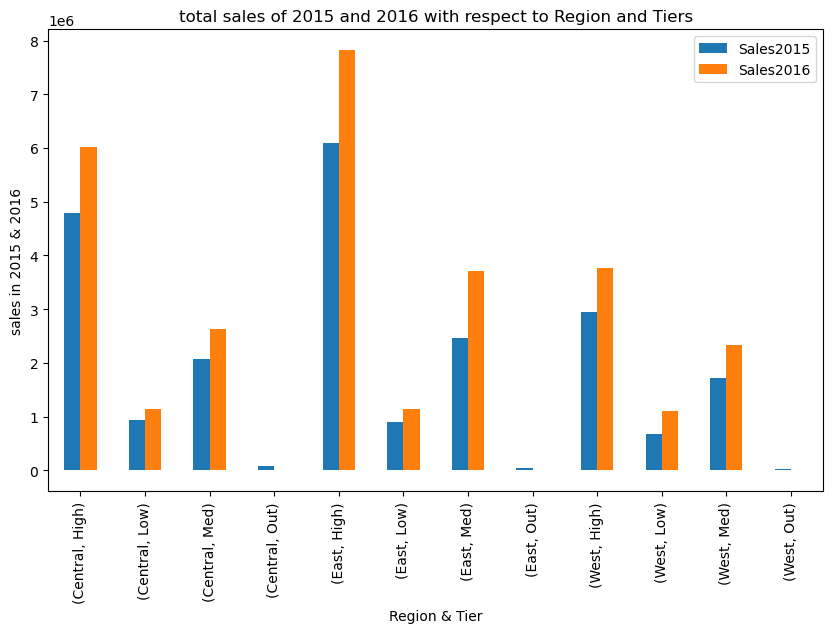

In [220]:
sale_tier.plot(kind='bar',figsize=(10,6))
plt.title("total sales of 2015 and 2016 with respect to Region and Tiers")
plt.xlabel('Region & Tier')
plt.ylabel('sales in 2015 & 2016')
plt.show()

## 4. In East region, which state registered a decline in 2016 as compared to 2015?


In [221]:
east_sale=sales[sales['Region'] =='East'].groupby(['Region','State'])[['Sales2015','Sales2016']].sum()

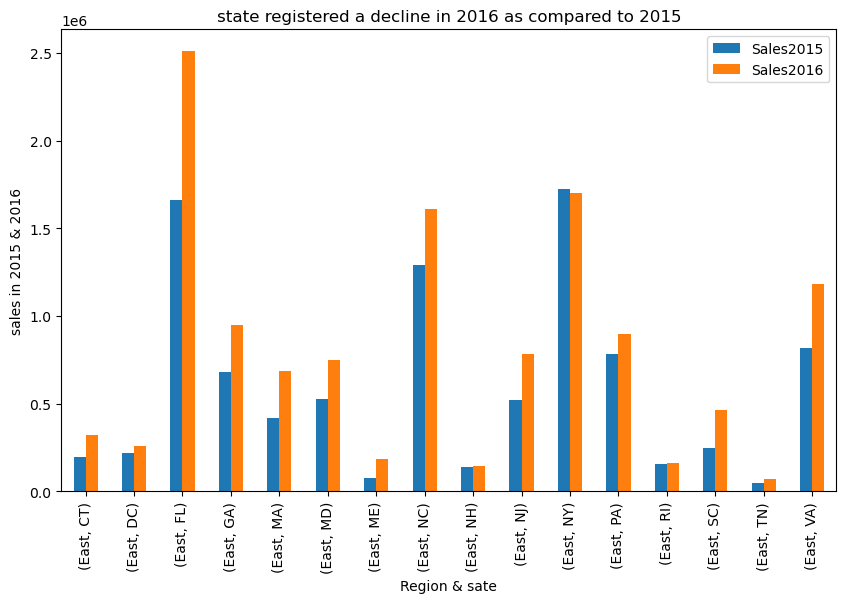

IN East region NY state registered a decline in sales in 2016 


In [222]:
east_sale.plot(kind='bar',figsize=(10,6))
plt.title('state registered a decline in 2016 as compared to 2015')
plt.xlabel("Region & sate")
plt.ylabel('sales in 2015 & 2016')
plt.show()

print('IN East region NY state registered a decline in sales in 2016 ')

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

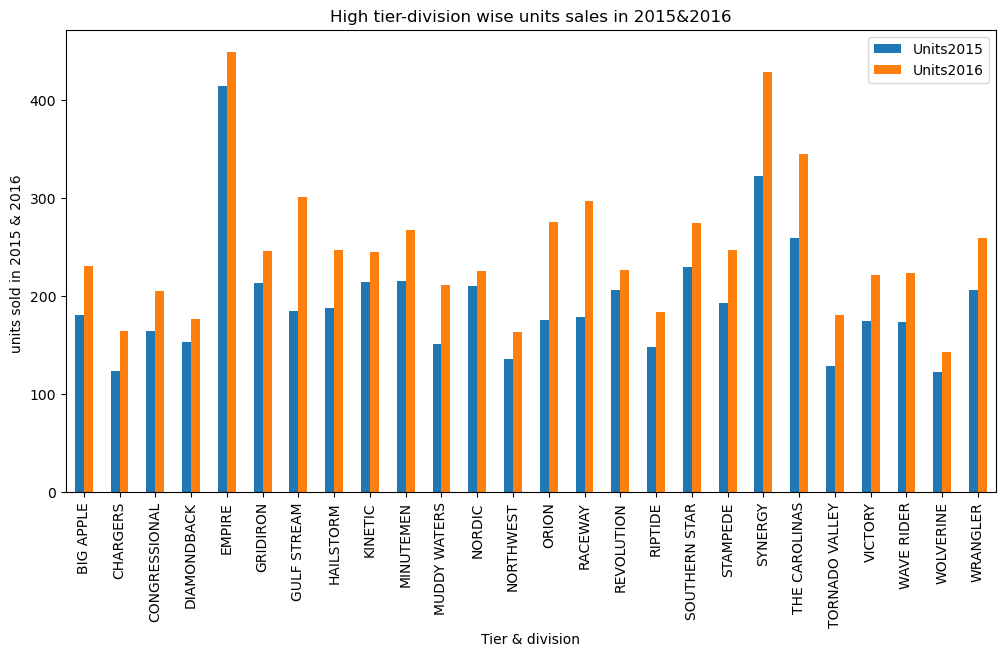

NO division saw a decline in number of units sale in 2016 compare to 2015 


In [223]:
high_unit = sales[sales['Tier'] == 'High'].groupby(['Tier','Division'])[['Units2015','Units2016']].sum()
high_unit.index=high_unit.index.droplevel(0)

high_unit.plot(kind='bar',figsize=(12,6))
plt.title('High tier-division wise units sales in 2015&2016')
plt.xlabel('Tier & division')
plt.ylabel('units sold in 2015 & 2016 ')
plt.show()

print('NO division saw a decline in number of units sale in 2016 compare to 2015 ')

## 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1

• Apr - Jun : Q2

• Jul - Sep : Q3

• Oct - Dec : Q4 

In [235]:
sales['Qtr'] = np.where((sales['Month'] =='Jan')|(sales['Month'] =='Feb')|(sales['Month'] =='Mar'), 'Q1',
                np.where((sales['Month'] =='Apr')|(sales['Month'] =='May')|(sales['Month'] =='Jun'), 'Q2',
                np.where((sales['Month'] =='Jul')|(sales['Month'] =='Aug')|(sales['Month'] =='Sep'), 'Q3',
                np.where((sales['Month'] =='Oct')|(sales['Month'] =='Nov')|(sales['Month'] =='Dec'),'Q4',np.nan))))

In [236]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


## 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [237]:
qtr_sale=sales.groupby(['Qtr'])[['Sales2015','Sales2016']].sum()
qtr_sale

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


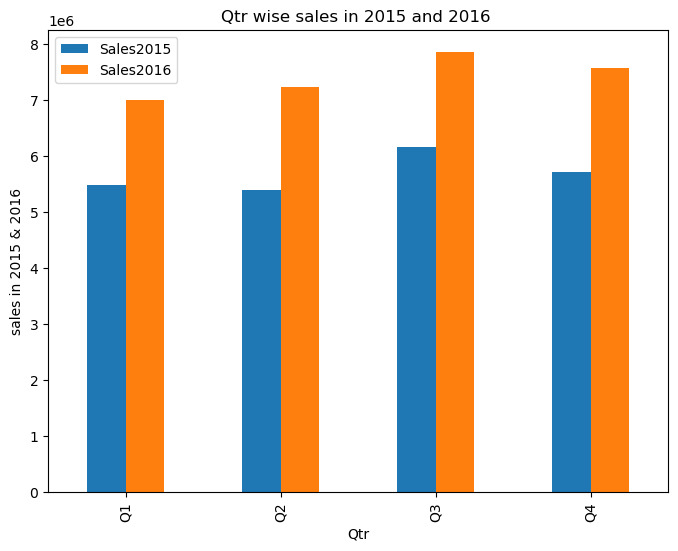

In [238]:
qtr_sale.plot(kind='bar',figsize=(8,6))
plt.title("Qtr wise sales in 2015 and 2016 ")
plt.xlabel('Qtr')
plt.ylabel("sales in 2015 & 2016")
plt.show()

## 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
 (Draw 4 pie charts representing a Quarter for each Tier)


In [239]:
pie_qtr = pd.pivot_table(sales, index='Qtr', columns='Tier', values='Sales2016', aggfunc='sum')
pie_qtr['Out'][2] =  -1 * -3248.53
pie_qtr

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.00
Q2,4130952.560,890594.75,2.215814e+06,0.00
Q3,4872559.250,795177.71,2.197058e+06,3248.53
Q4,4740001.985,742659.39,2.085207e+06,0.00


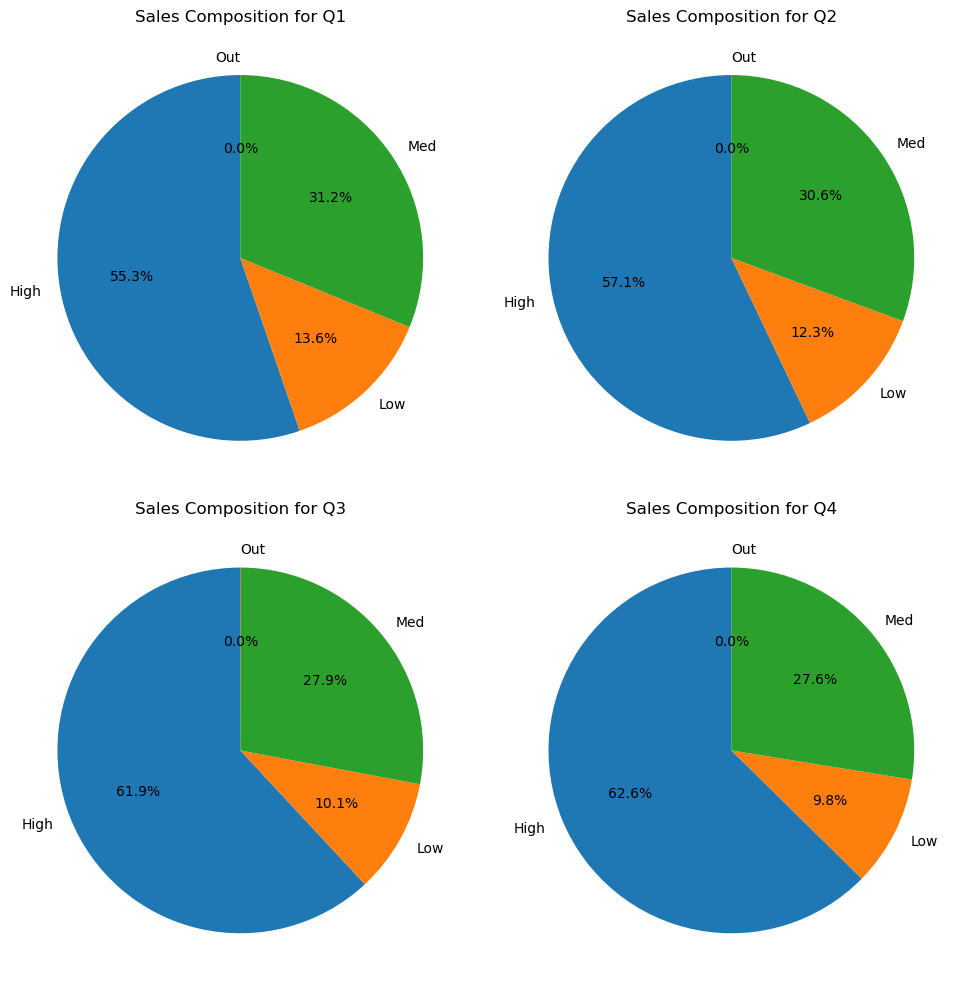

In [240]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()  
for i, (qtr, row) in  enumerate(pie_qtr.iterrows()):
    axs[i].pie(row, labels=row.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Sales Composition for {qtr}')

plt.tight_layout()
plt.show()